In [10]:
# get the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [11]:
#Kaggle Like: "https://www.kaggle.com/datasets/prathamtripathi/drug-classification"
#Dataset of Drugs
dataset = pd.read_csv('C:\\Users\\hp\\Documents\\ML\\Position_Salaries.csv')

In [12]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [13]:
# split the data into featutes and target variable seperately
X_l = dataset.iloc[:, 1:-1].values # features set
y_p = dataset.iloc[:, -1].values # set of study variable

In [14]:
print(X_l)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [15]:
print(y_p)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [16]:
y_p = y_p.reshape(-1,1)

In [17]:
from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
X_l = StdS_X.fit_transform(X_l)
y_p = StdS_y.fit_transform(y_p)

In [18]:
#Splitting the dataset 7:3
X_train, X_test, y_train, y_test = train_test_split(X_l, y_p, test_size=0.3, random_state=1)

In [19]:
print("Scaled X_l:")
print(X_l)
print("Scaled y_p:")
print(y_p)

Scaled X_l:
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
Scaled y_p:
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


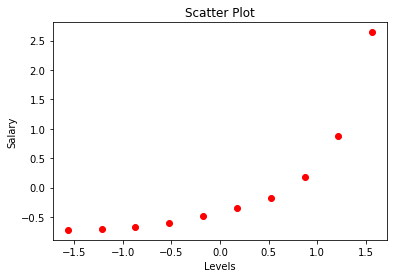

In [22]:
plt.scatter(X_l, y_p, color = 'red') # plotting the training set
plt.title('Scatter Plot') # adding a tittle to our plot
plt.xlabel('Levels') # adds a label to the x-axis
plt.ylabel('Salary') # adds a label to the y-axis
plt.show() # prints

In [30]:
# import the model
from sklearn.svm import SVR
# create the model object
regressor_r = SVR(kernel = 'rbf')
regressor_l = SVR(kernel = 'linear')
regressor_p = SVR(kernel = 'poly')
# fit the model on the data
regressor_r.fit(X_l, y_p)
regressor_l.fit(X_l, y_p)
regressor_p.fit(X_l, y_p)

F:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
F:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
F:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='poly')

In [31]:
A=regressor_r.predict(StdS_X.transform([[6.5]]))
B=regressor_l.predict(StdS_X.transform([[6.5]]))
C=regressor_p.predict(StdS_X.transform([[6.5]]))
print(A)
print(B)
print(C)

[-0.27861589]
[-0.11477079]
[-0.18379101]


In [32]:
# Convert A to 2D
A = A.reshape(-1,1)
B = B.reshape(-1,1)
C = C.reshape(-1,1)
print(A)
print(B)
print(C)

[[-0.27861589]]
[[-0.11477079]]
[[-0.18379101]]


In [33]:
# Taking the inverse of the scaled value
A_pred = StdS_y.inverse_transform(A)
print(A_pred)
B_pred = StdS_y.inverse_transform(B)
print(A_pred)
C_pred = StdS_y.inverse_transform(C)
print(A_pred)

[[170370.0204065]]
[[170370.0204065]]
[[170370.0204065]]


In [34]:
A_pred_A = StdS_y.inverse_transform(regressor_r.predict(StdS_X.transform([[6.5]])).reshape(-1,1))
print(A_pred_A)
B_pred_B = StdS_y.inverse_transform(regressor_l.predict(StdS_X.transform([[6.5]])).reshape(-1,1))
print(B_pred_B)
C_pred_C = StdS_y.inverse_transform(regressor_p.predict(StdS_X.transform([[6.5]])).reshape(-1,1))
print(C_pred_C)

[[170370.0204065]]
[[216903.83371158]]
[[197301.33007096]]


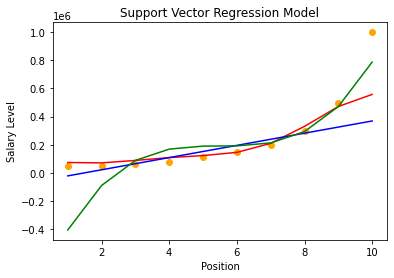

In [35]:
# inverse the transformation to go back to the initial scale
plt.scatter(StdS_X.inverse_transform(X_l), StdS_y.inverse_transform(y_p), color = 'orange')
plt.plot(StdS_X.inverse_transform(X_l), StdS_y.inverse_transform(regressor_r.predict(X_l).reshape(-1,1)), color = 'red')
plt.plot(StdS_X.inverse_transform(X_l), StdS_y.inverse_transform(regressor_l.predict(X_l).reshape(-1,1)), color = 'blue')
plt.plot(StdS_X.inverse_transform(X_l), StdS_y.inverse_transform(regressor_p.predict(X_l).reshape(-1,1)), color = 'green')
# add the title to the plot
plt.title('Support Vector Regression Model')
# label x axis
plt.xlabel('Position')
# label y axis
plt.ylabel('Salary Level')
# print the plot
plt.show()